## Pranav Singh Mahara
## 21BBS0188
## Lab Digital Assignment - 2

# ***Question - 1***

Collect the data set consists of 50 observations about patient enrolment in diet maintenance based on gender, weight, BMI etc (minimum 7 features). Implement a model that will recommend a strict diet is necessary or not for a patient using the naïve Bayes classification algorithm. (50x7)


In [106]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [107]:
df = pd.read_csv('/content/patient_enrollment_dataset.csv')

label_encoders = {}
for column in ['Gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()


,Gender,Age,Weight,Height,BMI,Physical_Activity,Cholesterol,Strict_Diet
0,1,25,70,170,24.2,3,180,0
1,0,34,65,165,23.9,5,170,0
2,1,29,85,180,26.2,2,250,1
3,0,45,55,155,22.9,7,210,0
4,1,50,90,185,26.3,1,260,1


In [108]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'Weight', 'Height', 'BMI', 'Physical_Activity', 'Cholesterol']]
y = df['Strict_Diet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 1]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.89      1.00      0.94         8

    accuracy                           0.92        13
   macro avg       0.94      0.90      0.92        13
weighted avg       0.93      0.92      0.92        13



In [110]:
data1=[1,29,50,180,22.2,2,150]
col = ['Gender','Age','Weight','Height','BMI','Physical_Activity','Cholesterol']
df3 = pd.DataFrame([data1],columns=col)
pr = nb_classifier.predict(df3)
print('Diet Adherence Prediction:', 'Yes' if pr[0] == 1 else 'No')

Diet Adherence Prediction: No


In [111]:
data2=[1,29,70,160,26.2,2,250]
df3 = pd.DataFrame([data2],columns=col)
pr = nb_classifier.predict(df3)
print('Diet Adherence Prediction:', 'Yes' if pr[0] == 1 else 'No')

Diet Adherence Prediction: Yes


# ***Question - 2***

Implement K-means method of clustering. Use the patient details data set to classify into 3 clusters such as a person is normal, healthy and weak. A person/patient must be clustered as any one of normal/healthy or weak based on his/her input values. (100 rows)


In [112]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

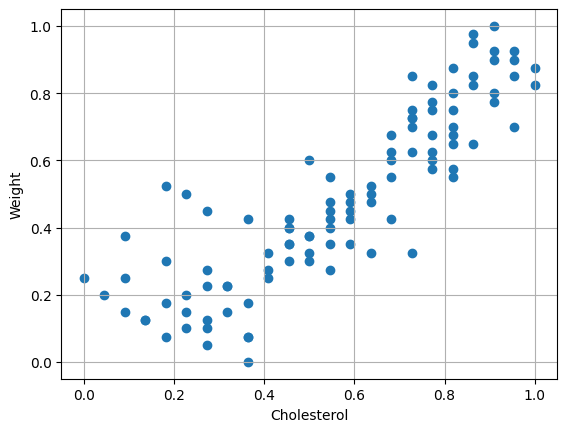

In [113]:
df = pd.read_csv('/content/patient-dataset.csv')
df.dropna(inplace=True)
_x = "Cholesterol"
_y = "Weight"
x = df[[_x]]
y = df[[_y]]
scaler = MinMaxScaler()
df[[_x]] = scaler.fit(df[[_x]]).transform(df[[_x]])
df[[_y]] = scaler.fit(df[[_y]]).transform(df[[_y]])
plt.scatter(df[[_x]],df[[_y]])
plt.xlabel(_x)
plt.ylabel(_y)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

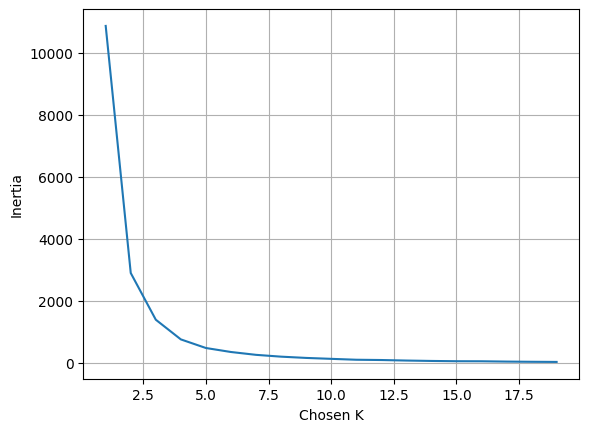

In [114]:
k_range = range(1,20)
err = []
for i in k_range:
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(y)
    err.append(km.inertia_)

plt.plot(k_range,err)
plt.xlabel("Chosen K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [115]:
km = KMeans(n_clusters=3,random_state=42)
y_pred=km.fit(df[[_y,_x]])
df2 = df[[_x,_y]]
df2.loc[:,'cluster'] = y_pred.labels_
df2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-115-1b9172defeaf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'cluster'] = y_pred.labels_


,Cholesterol,Weight,cluster
0,0.090909,0.375,1
1,0.000000,0.250,1
2,0.727273,0.750,0
3,0.363636,0.000,1
4,0.818182,0.875,0
...,...,...,...
97,0.818182,0.675,0
98,0.454545,0.350,2
99,0.590909,0.450,2
100,1.000000,0.875,0


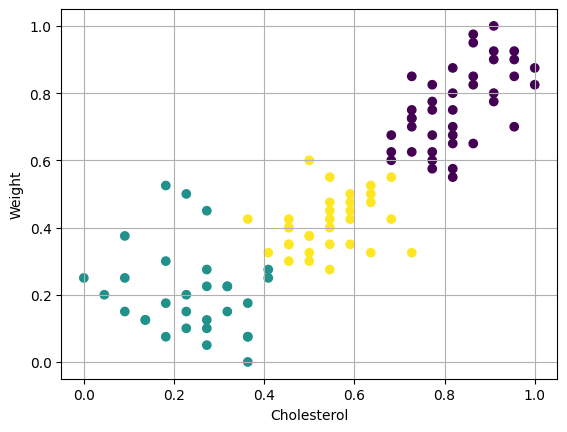

In [116]:
plt.scatter(x=df2[_x],y=df2[_y],c=df2['cluster'])
plt.xlabel(_x)
plt.ylabel(_y)
plt.grid(True)
plt.show()

# ***Question – 3***

The ID3 algorithm builds decision trees using a top-down greedy search approach through the space of possible branches with no backtracking. Consider a dataset of 50 rows “Road transport records” with the attributes “Road ID”, “Length”, Numberof_Bends”, “Trafficvolume” and “AccidentRisk”. Implement the same to the dataset to recommend the decision tree to classify the data.


In [117]:
import pandas as pd
import numpy as np
from math import log2
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/road-transport-records.csv')
df.head()

,Gender,Age,Weight,Height,BMI,Physical_Activity,Cholesterol,Strict_Diet
0,M,25,0.375,170,24.2,3,0.090909,0
1,F,34,0.250,165,23.9,5,0.000000,0
2,M,29,0.750,180,26.2,2,0.727273,1
3,F,45,0.000,155,22.9,7,0.363636,0
4,M,50,0.875,185,26.3,1,0.818182,1


In [118]:
X = data[['Length', 'Number_of_Bends', 'Traffic_Volume']]
y = data['Accident_Risk']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [119]:
# ID3 Algorithm implementation
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -sum(p * log2(p) for p in probabilities if p > 0)

def information_gain(X, y, feature, threshold):
    mask = X[feature] <= threshold
    left_y, right_y = y[mask], y[~mask]

    if len(left_y) == 0 or len(right_y) == 0:
        return 0

    return entropy(y) - (len(left_y) / len(y) * entropy(left_y) + len(right_y) / len(y) * entropy(right_y))

def find_best_split(X, y):
    best_gain = -1
    best_feature = None
    best_threshold = None

    for feature in X.columns:
        thresholds = np.unique(X[feature])
        for threshold in thresholds:
            gain = information_gain(X, y, feature, threshold)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

def build_tree(X, y, depth=0, max_depth=5):
    if len(np.unique(y)) == 1 or depth == max_depth:
        return Node(value=np.argmax(np.bincount(y)))

    feature, threshold = find_best_split(X, y)

    if feature is None:
        return Node(value=np.argmax(np.bincount(y)))

    mask = X[feature] <= threshold
    left = build_tree(X[mask], y[mask], depth + 1, max_depth)
    right = build_tree(X[~mask], y[~mask], depth + 1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left, right=right)

In [120]:
root = build_tree(X, y_encoded)

def print_tree(node, indent=""):
    if node.value is not None:
        print(indent + "Predict", le.inverse_transform([node.value])[0])
    else:
        print(indent + f"{node.feature} <= {node.threshold}")
        print_tree(node.left, indent + "  ")
        print(indent + f"{node.feature} > {node.threshold}")
        print_tree(node.right, indent + "  ")

print("ID3 Decision Tree:")
print_tree(root)

ID3 Decision Tree:
Length <= 8.3
  Traffic_Volume <= 1450
    Predict Low
  Traffic_Volume > 1450
    Length <= 4.8
      Predict Low
    Length > 4.8
      Predict Medium
Length > 8.3
  Predict High


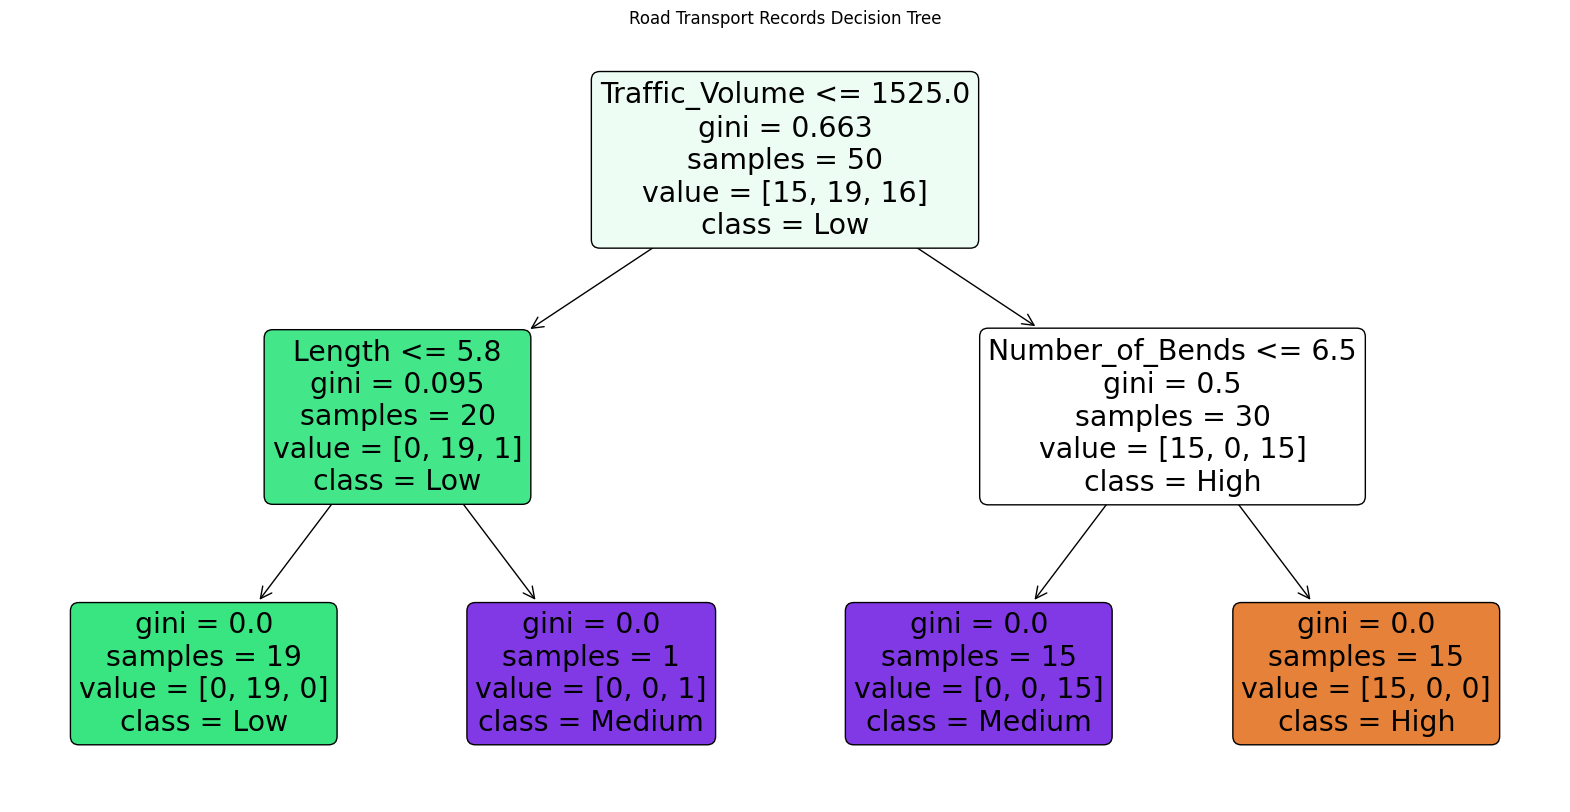

In [121]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Road Transport Records Decision Tree")
plt.show()

In [122]:
def classify(instance, node):
    if node.value is not None:
        return le.inverse_transform([node.value])[0]

    if instance[node.feature] <= node.threshold:
        return classify(instance, node.left)
    else:
        return classify(instance, node.right)

new_instance = {'Length': 7.0, 'Number_of_Bends': 2, 'Traffic_Volume': 200}
prediction = classify(new_instance, root)
print(f"\nClassification for {new_instance}:")
print(f"Predicted Accident Risk: {prediction}")


Classification for {'Length': 7.0, 'Number_of_Bends': 2, 'Traffic_Volume': 200}:
Predicted Accident Risk: Low


In [124]:
new_instance = {'Length': 7.0, 'Number_of_Bends': 9, 'Traffic_Volume': 2000}
prediction = classify(new_instance, root)
print(f"\nClassification for {new_instance}:")
print(f"Predicted Accident Risk: {prediction}")


Classification for {'Length': 7.0, 'Number_of_Bends': 9, 'Traffic_Volume': 2000}:
Predicted Accident Risk: Medium


In [126]:
new_instance = {'Length': 12, 'Number_of_Bends': 22, 'Traffic_Volume': 4000}
prediction = classify(new_instance, root)
print(f"\nClassification for {new_instance}:")
print(f"Predicted Accident Risk: {prediction}")


Classification for {'Length': 12, 'Number_of_Bends': 22, 'Traffic_Volume': 4000}:
Predicted Accident Risk: High


In [123]:
def print_classification_process(instance, node, indent=""):
    if node.value is not None:
        print(indent + f"Predict: {le.inverse_transform([node.value])[0]}")
    else:
        print(indent + f"Is {node.feature} <= {node.threshold}?")
        if instance[node.feature] <= node.threshold:
            print(indent + "Yes")
            print_classification_process(instance, node.left, indent + "  ")
        else:
            print(indent + "No")
            print_classification_process(instance, node.right, indent + "  ")

print("\nClassification Process:")
print_classification_process(new_instance, root)


Classification Process:
Is Length <= 8.3?
Yes
  Is Traffic_Volume <= 1450?
  Yes
    Predict: Low
